In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [2]:
import keras_tuner as kt
from keras_tuner import RandomSearch

In [3]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [4]:
import relative_accuracy as ra
from statistics import mean, stdev
import geh as ga

In [5]:
# Load all Inputs and Output Data

# 5 mins (1 step ahead)
Deep_train_5   = np.load("Deep_train_5_multi.npz")['x'] 
Output_train_5 = np.load("Deep_train_5_multi.npz")['y']

Deep_test_5   = np.load("Deep_test_5_multi.npz")['x'] 
Output_test_5 = np.load("Deep_test_5_multi.npz")['y'] 

# 15 mins (3 steps ahead)
Deep_train_15   = np.load("Deep_train_15_multi.npz")['x'] 
Output_train_15 = np.load("Deep_train_15_multi.npz")['y']

Deep_test_15   = np.load("Deep_test_15_multi.npz")['x'] 
Output_test_15 = np.load("Deep_test_15_multi.npz")['y']

# 30 mins (6 steps ahead)
Deep_train_30   = np.load("Deep_train_30_multi.npz")['x'] 
Output_train_30 = np.load("Deep_train_30_multi.npz")['y']

Deep_test_30   = np.load("Deep_test_30_multi.npz")['x'] 
Output_test_30 = np.load("Deep_test_30_multi.npz")['y']

# 60 mins (12 steps ahead)
Deep_train_60   = np.load("Deep_train_60_multi.npz")['x'] 
Output_train_60 = np.load("Deep_train_60_multi.npz")['y']

Deep_test_60   = np.load("Deep_test_60_multi.npz")['x'] 
Output_test_60 = np.load("Deep_test_60_multi.npz")['y']

In [6]:
# Wide Week Data
Xtrain = joblib.load("002weeks_train.save") 
Xtest = joblib.load("002weeks_test.save") 

# Wide Day Data
Xtrain_day = joblib.load("002days_train.save") 
Xtest_day = joblib.load("002days_test.save") 

In [7]:
# 5 mins
# Delete first 15 samples
Wide_train_5 = np.delete(Xtrain, np.s_[0:15], 0)
Wide_test_5 = np.delete(Xtest, np.s_[0:15], 0)

Wide_train_5_day = np.delete(Xtrain_day, np.s_[0:15], 0)
Wide_test_5_day = np.delete(Xtest_day, np.s_[0:15], 0)

In [8]:
# 15 mins
# Delete first 17 samples
Wide_train_15 = np.delete(Xtrain, np.s_[0:17], 0)
Wide_test_15 = np.delete(Xtest, np.s_[0:17], 0)

Wide_train_15_day = np.delete(Xtrain_day, np.s_[0:17], 0)
Wide_test_15_day = np.delete(Xtest_day, np.s_[0:17], 0)

In [9]:
# 30 mins
# Delete first 20 samples
Wide_train_30 = np.delete(Xtrain, np.s_[0:20], 0)
Wide_test_30 = np.delete(Xtest, np.s_[0:20], 0)

Wide_train_30_day = np.delete(Xtrain_day, np.s_[0:20], 0)
Wide_test_30_day = np.delete(Xtest_day, np.s_[0:20], 0)

In [10]:
# 60 mins
# Delete first 27 samples
Wide_train_60 = np.delete(Xtrain, np.s_[0:26], 0)
Wide_test_60 = np.delete(Xtest, np.s_[0:26], 0)

Wide_train_60_day = np.delete(Xtrain_day, np.s_[0:26], 0)
Wide_test_60_day = np.delete(Xtest_day, np.s_[0:26], 0)

In [11]:
scaler_filename = "scaler.save"
scaler = joblib.load(scaler_filename) 

In [12]:
Test      = pd.read_csv('01test_scaled.csv', index_col=None, parse_dates=[0])

# Reshape Samples

The first step is to split the input sequences into subsequences that can be processed by the CNN model. Here, each spatio-temporal sample can be split into three sub-samples, each with five time steps. The CNN can interpret each subsequence of five time steps and provide a time series of interpretations of the subsequences to the LSTM model to process as input.

In [13]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 6              # No of loop detectors
n_seq = 3                    # Subsequences
n_steps = 5                  # time-step per subsequence
val_percent = 0.2            # 2 weeks
batch_size = 32

#### 5 mins

In [14]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt5 = Deep_train_5.reshape((Deep_train_5.shape[0], n_seq, n_steps, n_features))
yt5 = scaler.inverse_transform(Output_train_5)

In [15]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv5 = Deep_test_5.reshape((Deep_test_5.shape[0], n_seq, n_steps, n_features))
yv5 = scaler.inverse_transform(Output_test_5)

#### 15 mins

In [16]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt15 = Deep_train_15.reshape((Deep_train_15.shape[0], n_seq, n_steps, n_features))
yt15 = scaler.inverse_transform(Output_train_15)

In [17]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv15 = Deep_test_15.reshape((Deep_test_15.shape[0], n_seq, n_steps, n_features))
yv15 = scaler.inverse_transform(Output_test_15)

#### 30 mins

In [18]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt30 = Deep_train_30.reshape((Deep_train_30.shape[0], n_seq, n_steps, n_features))
yt30 = scaler.inverse_transform(Output_train_30)

In [19]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv30 = Deep_test_30.reshape((Deep_test_30.shape[0], n_seq, n_steps, n_features))
yv30 = scaler.inverse_transform(Output_test_30)

#### 60 mins

In [20]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt60 = Deep_train_60.reshape((Deep_train_60.shape[0], n_seq, n_steps, n_features))
yt60 = scaler.inverse_transform(Output_train_60)

In [21]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv60 = Deep_test_60.reshape((Deep_test_60.shape[0], n_seq, n_steps, n_features))
yv60 = scaler.inverse_transform(Output_test_60)

### Reshaping the Data for Conv2D layer

For Conv2D, there is a need to add one more dimension to show we're dealing with 1 channel (since technically the images are in black and white, only showing values from 0-max flow on a single channel).

Conv1D - strides in 1 dimension
Conv2D - strides in 2 dimensions

In [22]:
# define no_of_channels
n_channels = 1

In [23]:
# Train data
Xt5  =  Xt5.reshape(Xt5.shape[0], n_seq, n_steps, n_features, n_channels)
Xt15 =  Xt15.reshape(Xt15.shape[0], n_seq, n_steps, n_features, n_channels)
Xt30 =  Xt30.reshape(Xt30.shape[0], n_seq, n_steps, n_features, n_channels)
Xt60 =  Xt60.reshape(Xt60.shape[0], n_seq, n_steps, n_features, n_channels)

# Validation data
Xv5  =  Xv5.reshape(Xv5.shape[0], n_seq, n_steps, n_features, n_channels)
Xv15 =  Xv15.reshape(Xv15.shape[0], n_seq, n_steps, n_features, n_channels)
Xv30 =  Xv30.reshape(Xv30.shape[0], n_seq, n_steps, n_features, n_channels)
Xv60 =  Xv60.reshape(Xv60.shape[0], n_seq, n_steps, n_features, n_channels)

In [24]:
Wide_train_5 = np.expand_dims(Wide_train_5, 1)
Wide_train_15 = np.expand_dims(Wide_train_15, 1)
Wide_train_30 = np.expand_dims(Wide_train_30, 1)
Wide_train_60 = np.expand_dims(Wide_train_60, 1)

Wide_test_5 = np.expand_dims(Wide_test_5, 1)
Wide_test_15 = np.expand_dims(Wide_test_15, 1)
Wide_test_30 = np.expand_dims(Wide_test_30, 1)
Wide_test_60 = np.expand_dims(Wide_test_60, 1)

In [25]:
Wide_train_5_day = np.expand_dims(Wide_train_5_day, 1)
Wide_train_15_day = np.expand_dims(Wide_train_15_day, 1)
Wide_train_30_day = np.expand_dims(Wide_train_30_day, 1)
Wide_train_60_day = np.expand_dims(Wide_train_60_day, 1)

Wide_test_5_day = np.expand_dims(Wide_test_5_day, 1)
Wide_test_15_day = np.expand_dims(Wide_test_15_day, 1)
Wide_test_30_day = np.expand_dims(Wide_test_30_day, 1)
Wide_test_60_day = np.expand_dims(Wide_test_60_day, 1)

In [26]:
Wt5  = Wide_train_5
Wt15 = Wide_train_15
Wt30 = Wide_train_30
Wt60 = Wide_train_60

Wv5  = Wide_test_5
Wv15 = Wide_test_15
Wv30 = Wide_test_30
Wv60 = Wide_test_60

In [27]:
Wt5x  = Wide_train_5_day
Wt15x = Wide_train_15_day
Wt30x = Wide_train_30_day
Wt60x = Wide_train_60_day

Wv5x  = Wide_test_5_day
Wv15x = Wide_test_15_day
Wv30x = Wide_test_30_day
Wv60x = Wide_test_60_day

# CNN-LSTM model

In [28]:
from tensorflow import keras
from keras_self_attention import SeqSelfAttention

# Early Stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [29]:
stop = keras.callbacks.EarlyStopping(
    monitor = 'val_loss', 
    patience = 5, 
    restore_best_weights = True)

In [30]:
Wide_train_5.shape

(49233, 1, 14)

In [31]:
Xt5.shape[1:]

(3, 5, 6, 1)

# 5 mins ahead

In [32]:
def build_model_5(hp):
    # Inputs
    channel_Wide = keras.layers.Input(shape=Wide_train_5.shape[1:], name="wide_week")
    channel_Widex = keras.layers.Input(shape=Wide_train_5_day.shape[1:], name="wide_day")
    channel_Deep = keras.layers.Input(shape=Xt5.shape[1:], name="weep_input")
    
    # Wide Model
    Wide_5 = keras.layers.Bidirectional(
        keras.layers.LSTM(units=hp.Int("wide_week_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu'))(channel_Wide)
    
    Wide_5x = keras.layers.Bidirectional(
        keras.layers.LSTM(units=hp.Int("wide_day_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu'))(channel_Widex)
       
    # Deep Model
    # CNN 
    CNN_5a = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    CNN_5b = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(CNN_5a)
    flatten_5 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_5b)
    # LSTM          
    LSTM_5a = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu', return_sequences=True)(flatten_5)
    LSTM_5b = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu', return_sequences=True)(LSTM_5a)
    Att_5 = SeqSelfAttention(attention_activation='tanh')(LSTM_5b)
    Reshaped_5 = keras.layers.Flatten()(Att_5)
    
    # Concatenation 
    concat = keras.layers.concatenate([Wide_5, Wide_5x, Reshaped_5])
    
    # Output
    output = keras.layers.Dense(n_features, name= "output")(concat)
    
    # Model
    model_5 = keras.Model(inputs=[channel_Wide, channel_Widex, channel_Deep], outputs=[output])

    # Compile
    model_5.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss='mse',metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_5

In [33]:
tuner5 = RandomSearch(
    build_model_5,
    objective="val_loss",
    max_trials=30,
    executions_per_trial=2,
    overwrite=False,
    directory=os.path.normpath('C:/RunsOak'),
    project_name="6ai-Conv-LSTM-5",
)

INFO:tensorflow:Reloading Oracle from existing project C:\RunsOak\6ai-Conv-LSTM-5\oracle.json
INFO:tensorflow:Reloading Tuner from C:\RunsOak\6ai-Conv-LSTM-5\tuner0.json


In [34]:
tuner5.search_space_summary()

Search space summary
Default search space size: 6
wide_week_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
wide_day_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
units_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [35]:
tuner5.search((Wt5, Wt5x, Xt5), yt5, epochs=200,
           validation_split = val_percent,
           callbacks = [early_stop],
           verbose=2)

Trial 30 Complete [00h 09m 41s]
val_loss: 411.18780517578125

Best val_loss So Far: 383.05503845214844
Total elapsed time: 19h 32m 03s
INFO:tensorflow:Oracle triggered exit


In [35]:
tuner5.results_summary(1)

Results summary
Results in C:\RunsOak\6ai-Conv-LSTM-5
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
wide_week_LSTM: 44
wide_day_LSTM: 11
filters: 160
kernel_size: 2
units_LSTM: 84
learning_rate: 0.0001
Score: 383.05503845214844


### Best Model

In [36]:
best_hp5 = tuner5.get_best_hyperparameters()[0]
model5 = tuner5.hypermodel.build(best_hp5)

In [38]:
scaler_filename = "Best_HP/6ai-Conv_LSTM-5"
joblib.dump(best_hp5, scaler_filename) 

['Best_HP/6ai-Conv_LSTM-5']

In [37]:
model5.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 weep_input (InputLayer)        [(None, 3, 5, 6, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_3 (TimeDistri  (None, 3, 4, 5, 160  800        ['weep_input[0][0]']             
 buted)                         )                                                                 
                                                                                                  
 time_distributed_4 (TimeDistri  (None, 3, 3, 4, 160  102560     ['time_distributed_3[0][0]']     
 buted)                         )                                                           

In [38]:
model5.fit((Wt5, Wt5x, Xt5), yt5, 
           epochs = 100, 
           verbose = 1)

Epoch 1/100
1539/1539 [==============================] - 25s 13ms/step - loss: 2559.4182 - mean_absolute_error: 29.1377 - root_mean_squared_error: 50.5907 - mean_absolute_percentage_error: 48.6281
Epoch 2/100
1539/1539 [==============================] - 19s 12ms/step - loss: 628.9183 - mean_absolute_error: 17.4698 - root_mean_squared_error: 25.0782 - mean_absolute_percentage_error: 27.3743
Epoch 3/100
1539/1539 [==============================] - 19s 12ms/step - loss: 581.1294 - mean_absolute_error: 16.7117 - root_mean_squared_error: 24.1066 - mean_absolute_percentage_error: 24.8704
Epoch 4/100
1539/1539 [==============================] - 18s 12ms/step - loss: 509.5873 - mean_absolute_error: 15.8473 - root_mean_squared_error: 22.5740 - mean_absolute_percentage_error: 22.9773
Epoch 5/100
1539/1539 [==============================] - 19s 12ms/step - loss: 463.3092 - mean_absolute_error: 15.1629 - root_mean_squared_error: 21.5246 - mean_absolute_percentage_error: 21.8920 1s - loss: 464.4133

1539/1539 [==============================] - 19s 12ms/step - loss: 334.3143 - mean_absolute_error: 12.7707 - root_mean_squared_error: 18.2843 - mean_absolute_percentage_error: 16.8887
Epoch 83/100
1539/1539 [==============================] - 19s 12ms/step - loss: 333.5102 - mean_absolute_error: 12.7717 - root_mean_squared_error: 18.2623 - mean_absolute_percentage_error: 16.8906
Epoch 84/100
1539/1539 [==============================] - 19s 12ms/step - loss: 333.5576 - mean_absolute_error: 12.7717 - root_mean_squared_error: 18.2636 - mean_absolute_percentage_error: 16.8721
Epoch 85/100
1539/1539 [==============================] - 19s 12ms/step - loss: 333.3536 - mean_absolute_error: 12.7657 - root_mean_squared_error: 18.2580 - mean_absolute_percentage_error: 16.8606
Epoch 86/100
1539/1539 [==============================] - 20s 13ms/step - loss: 331.8982 - mean_absolute_error: 12.7392 - root_mean_squared_error: 18.2181 - mean_absolute_percentage_error: 16.8165
Epoch 87/100
1539/1539 [====

In [39]:
model5.save("my_dir/6ai-Conv-LSTM-5")

INFO:tensorflow:Assets written to: my_dir/6ai-Conv-LSTM-5\assets


In [40]:
metrics5 = pd.DataFrame(model5.history.history)

<AxesSubplot:>

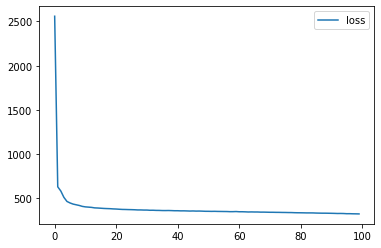

In [41]:
metrics5[['loss']].plot()

In [32]:
model5 = keras.models.load_model("my_dir/6ai-Conv-LSTM-5") 

In [33]:
model5.predict((Wv5, Wv5x, Xv5))

array([[ 30.56644  ,  18.472122 ,  26.520273 ,  76.05745  ,  32.041523 ,
          4.4170156],
       [ 30.91039  ,  18.199957 ,  26.264954 ,  78.06237  ,  33.42017  ,
          4.5917926],
       [ 30.561365 ,  17.439255 ,  24.886017 ,  72.12781  ,  30.644293 ,
          4.0479827],
       ...,
       [ 41.111885 ,  41.535217 ,  50.47345  , 103.872925 ,  47.822456 ,
         12.976091 ],
       [ 41.420677 ,  40.818954 ,  49.591873 , 100.413734 ,  46.35575  ,
         15.37064  ],
       [ 40.217384 ,  39.902344 ,  53.785404 , 103.26344  ,  46.850735 ,
         14.696518 ]], dtype=float32)

### Evaluation on inverse_transform

In [ ]:
test_predictions5 = model5.predict((Wv5, Wv5x, Xv5))


MSE5 = mean_squared_error(yv5,test_predictions5)

MAE5 = mean_absolute_error(yv5,test_predictions5)

RMSE5 = np.sqrt(MSE5)

MAPE5 = mean_absolute_percentage_error(yv5,test_predictions5)*100

eval5 = [MSE5, MAE5, RMSE5, MAPE5]
print(eval5)

In [ ]:
GEH, count = ga.GEH(np.asarray(yv5), np.asarray(test_predictions5))
GEH5 = count/GEH.size
print(GEH5)

# 15 mins ahead

In [38]:
def build_model_15(hp):
    # Inputs
    channel_Wide = keras.layers.Input(shape=Wide_train_15.shape[1:], name="wide_week")
    channel_Widex = keras.layers.Input(shape=Wide_train_15_day.shape[1:], name="wide_day")
    channel_Deep = keras.layers.Input(shape=Xt15.shape[1:], name="deep_input")
    
    # Wide Model
    Wide_15 = keras.layers.Bidirectional(
        keras.layers.LSTM(units=hp.Int("wide_week_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu'))(channel_Wide)
    
    Wide_15x = keras.layers.Bidirectional(
        keras.layers.LSTM(units=hp.Int("wide_day_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu'))(channel_Widex)
    
    # Deep Model
    # CNN 
    CNN_15a = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    CNN_15b = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(CNN_15a)
    flatten_15 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_15b)
    # LSTM          
    LSTM_15a = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu', return_sequences=True)(flatten_15)
    LSTM_15b = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu', return_sequences=True)(LSTM_15a)
    Att_15 = SeqSelfAttention(attention_activation='tanh')(LSTM_15b)
    Reshaped_15 = keras.layers.Flatten()(Att_15)
    
    # Concatenation 
    concat = keras.layers.concatenate([Wide_15, Wide_15x, Reshaped_15])
    
    # Output
    output = keras.layers.Dense(n_features, name= "output")(concat)
    
    # Model
    model_15 = keras.Model(inputs=[channel_Wide, channel_Widex, channel_Deep], outputs=[output])

    # Compile
    model_15.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss='mse',metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_15

In [39]:
tuner15 = RandomSearch(
    build_model_15,
    objective="val_loss",
    max_trials=30,
    executions_per_trial=2,
    overwrite=False,
    directory=os.path.normpath('C:/RunsOak'),
    project_name="6ai-Conv-LSTM-15",
)

INFO:tensorflow:Reloading Oracle from existing project C:\RunsOak\6ai-Conv-LSTM-15\oracle.json
INFO:tensorflow:Reloading Tuner from C:\RunsOak\6ai-Conv-LSTM-15\tuner0.json


In [48]:
tuner15.search_space_summary()

Search space summary
Default search space size: 6
wide_week_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
wide_day_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
units_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [49]:
tuner15.search((Wt15, Wt15x, Xt15), yt15, epochs=200,
            validation_split = val_percent,
            callbacks=[early_stop], 
            verbose=2)

Trial 30 Complete [01h 53m 39s]
val_loss: 531.2861022949219

Best val_loss So Far: 443.6429443359375
Total elapsed time: 00h 52m 43s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [50]:
tuner15.results_summary(1)

Results summary
Results in C:\RunsOak\6ai-Conv-LSTM-15
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
wide_week_LSTM: 84
wide_day_LSTM: 91
filters: 448
kernel_size: 2
units_LSTM: 62
learning_rate: 0.001
Score: 443.6429443359375


### Best model

In [51]:
best_hp15 = tuner15.get_best_hyperparameters()[0]
model15 = tuner15.hypermodel.build(best_hp15)

In [52]:
scaler_filename = "Best_HP/6ai-Conv_LSTM-15"
joblib.dump(best_hp15, scaler_filename) 

['Best_HP/6ai-Conv_LSTM-15']

In [53]:
model15.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 3, 5, 6, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_3 (TimeDistri  (None, 3, 4, 5, 448  2240       ['deep_input[0][0]']             
 buted)                         )                                                                 
                                                                                                  
 time_distributed_4 (TimeDistri  (None, 3, 3, 4, 448  803264     ['time_distributed_3[0][0]']     
 buted)                         )                                                           

In [54]:
model15.fit((Wt15, Wt15x, Xt15), yt15, 
           epochs = 100, 
           verbose = 1)

Epoch 1/100
1539/1539 [==============================] - 201s 124ms/step - loss: 1245.5720 - mean_absolute_error: 23.0608 - root_mean_squared_error: 35.2927 - mean_absolute_percentage_error: 38.2867
Epoch 2/100
1539/1539 [==============================] - 192s 125ms/step - loss: 566.6308 - mean_absolute_error: 16.8863 - root_mean_squared_error: 23.8040 - mean_absolute_percentage_error: 25.3641
Epoch 3/100
1539/1539 [==============================] - 192s 125ms/step - loss: 523.2631 - mean_absolute_error: 16.1756 - root_mean_squared_error: 22.8750 - mean_absolute_percentage_error: 23.7786
Epoch 4/100
1539/1539 [==============================] - 193s 126ms/step - loss: 501.7992 - mean_absolute_error: 15.7900 - root_mean_squared_error: 22.4009 - mean_absolute_percentage_error: 23.3368
Epoch 5/100
1539/1539 [==============================] - 193s 125ms/step - loss: 490.6471 - mean_absolute_error: 15.5924 - root_mean_squared_error: 22.1505 - mean_absolute_percentage_error: 22.6108
Epoch 6/1

1539/1539 [==============================] - 201s 131ms/step - loss: 323.2784 - mean_absolute_error: 12.6832 - root_mean_squared_error: 17.9799 - mean_absolute_percentage_error: 17.5669
Epoch 83/100
1539/1539 [==============================] - 202s 131ms/step - loss: 319.4972 - mean_absolute_error: 12.6078 - root_mean_squared_error: 17.8745 - mean_absolute_percentage_error: 17.4675
Epoch 84/100
1539/1539 [==============================] - 202s 131ms/step - loss: 318.8958 - mean_absolute_error: 12.6072 - root_mean_squared_error: 17.8576 - mean_absolute_percentage_error: 17.4264
Epoch 85/100
1539/1539 [==============================] - 202s 131ms/step - loss: 317.9579 - mean_absolute_error: 12.5778 - root_mean_squared_error: 17.8314 - mean_absolute_percentage_error: 17.3918
Epoch 86/100
1539/1539 [==============================] - 202s 131ms/step - loss: 315.4563 - mean_absolute_error: 12.5326 - root_mean_squared_error: 17.7611 - mean_absolute_percentage_error: 17.3497
Epoch 87/100
1539/

In [37]:
model15.save("my_dir/6ai-Conv-LSTM-15")

In [56]:
metrics15 = pd.DataFrame(model15.history.history)

<AxesSubplot:>

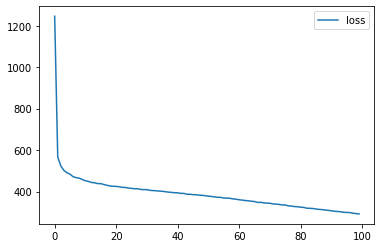

In [57]:
metrics15[['loss']].plot()

In [36]:
model15 = keras.models.load_model("my_dir/6ai-Conv-LSTM-15")

In [37]:
model15.predict((Wv15, Wv15x, Xv15))

array([[ 30.915487 ,  20.382673 ,  19.589142 ,  66.91815  ,  27.459383 ,
          5.604286 ],
       [ 30.807465 ,  20.061268 ,  18.05259  ,  67.46942  ,  28.698683 ,
          7.744875 ],
       [ 30.81324  ,  19.312988 ,  15.918243 ,  65.70153  ,  27.950382 ,
          7.2604103],
       ...,
       [ 45.33571  ,  46.97686  ,  62.511486 , 117.00415  ,  54.56058  ,
         20.655792 ],
       [ 44.62492  ,  45.70759  ,  59.56116  , 113.42606  ,  53.759254 ,
         24.91065  ],
       [ 43.16292  ,  43.473473 ,  53.04816  , 109.042595 ,  54.34871  ,
         24.800922 ]], dtype=float32)

### Evaluation on inverse_transform

In [ ]:
test_predictions15 = model15.predict((Wv15, Wv15x, Xv15))


MSE15 = mean_squared_error(yv15,test_predictions15)

MAE15 = mean_absolute_error(yv15,test_predictions15)

RMSE15 = np.sqrt(MSE15)

MAPE15 = mean_absolute_percentage_error(yv15,test_predictions15)*100

eval15 = [MSE15, MAE15, RMSE15, MAPE15]
print(eval15)

In [ ]:
GEH, count = ga.GEH(np.asarray(yv15), np.asarray(test_predictions15))
GEH15 = count/GEH.size
print(GEH15)

# 30 mins ahead

In [44]:
def build_model_30(hp):
    # Inputs
    channel_Wide = keras.layers.Input(shape=Wide_train_30.shape[1:], name="wide_week")
    channel_Widex = keras.layers.Input(shape=Wide_train_30_day.shape[1:], name="wide_day")
    channel_Deep = keras.layers.Input(shape=Xt30.shape[1:], name="deep_input")
    
    # Wide Model
    Wide_30 = keras.layers.Bidirectional(
        keras.layers.LSTM(units=hp.Int("wide_week_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu'))(channel_Wide)
    
    Wide_30x = keras.layers.Bidirectional(
        keras.layers.LSTM(units=hp.Int("wide_day_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu'))(channel_Widex)
    
    # Deep Model
    # CNN 
    CNN_30a = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    CNN_30b = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(CNN_30a)
    flatten_30 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_30b)
    # LSTM          
    LSTM_30a = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu', return_sequences=True)(flatten_30)
    LSTM_30b = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu', return_sequences=True)(LSTM_30a)
    Att_30 = SeqSelfAttention(attention_activation='tanh')(LSTM_30b)
    Reshaped_30 = keras.layers.Flatten()(Att_30)
    
    # Concatenation 
    concat = keras.layers.concatenate([Wide_30, Wide_30x, Reshaped_30])
    
    # Output
    output = keras.layers.Dense(n_features, name= "output")(concat)
    
    # Model
    model_30 = keras.Model(inputs=[channel_Wide, channel_Widex, channel_Deep], outputs=[output])

    # Compile
    model_30.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss='mse',metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_30

In [45]:
tuner30 = RandomSearch(
    build_model_30,
    objective="val_loss",
    max_trials=30,
    executions_per_trial=2,
    overwrite=False,
    directory=os.path.normpath('C:/RunsOak'),
    project_name="6ai-Conv-LSTM-30",
)

INFO:tensorflow:Reloading Oracle from existing project C:\RunsOak\6ai-Conv-LSTM-30\oracle.json
INFO:tensorflow:Reloading Tuner from C:\RunsOak\6ai-Conv-LSTM-30\tuner0.json


In [46]:
tuner30.search_space_summary()

Search space summary
Default search space size: 6
wide_week_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
wide_day_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
units_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [47]:
tuner30.search((Wt30, Wt30x, Xt30), yt30, epochs=200,
            validation_split = val_percent,
            callbacks=[early_stop],
            verbose=2)

INFO:tensorflow:Oracle triggered exit


In [48]:
tuner30.results_summary(1)

Results summary
Results in C:\RunsOak\6ai-Conv-LSTM-30
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
wide_week_LSTM: 80
wide_day_LSTM: 69
filters: 480
kernel_size: 3
units_LSTM: 86
learning_rate: 0.001
Score: 492.529052734375


### Best model

In [49]:
best_hp30 = tuner30.get_best_hyperparameters()[0]
model30 = tuner30.hypermodel.build(best_hp30)

In [50]:
scaler_filename = "6ai-Conv_LSTM-30"
joblib.dump(best_hp30, scaler_filename) 

['6ai-Conv_LSTM-30']

In [51]:
model30.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 3, 5, 6, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_9 (TimeDistri  (None, 3, 3, 4, 480  4800       ['deep_input[0][0]']             
 buted)                         )                                                                 
                                                                                                  
 time_distributed_10 (TimeDistr  (None, 3, 1, 2, 480  2074080    ['time_distributed_9[0][0]']     
 ibuted)                        )                                                           

In [54]:
model30.fit((Wt30, Wt30x, Xt30), yt30, 
            epochs = 100, 
            verbose = 1)

Epoch 1/100
1539/1539 [==============================] - 140s 91ms/step - loss: 781.5687 - mean_absolute_error: 19.6793 - root_mean_squared_error: 27.9565 - mean_absolute_percentage_error: 30.0728
Epoch 2/100
1539/1539 [==============================] - 140s 91ms/step - loss: 656.5806 - mean_absolute_error: 18.0810 - root_mean_squared_error: 25.6238 - mean_absolute_percentage_error: 26.1562
Epoch 3/100
1539/1539 [==============================] - 140s 91ms/step - loss: 603.2578 - mean_absolute_error: 17.3673 - root_mean_squared_error: 24.5613 - mean_absolute_percentage_error: 25.3824
Epoch 4/100
1539/1539 [==============================] - 180s 117ms/step - loss: 582.5967 - mean_absolute_error: 17.0091 - root_mean_squared_error: 24.1370 - mean_absolute_percentage_error: 24.53430s - loss: 583.7686 - mean_absolu
Epoch 5/100
1539/1539 [==============================] - 203s 132ms/step - loss: 562.4391 - mean_absolute_error: 16.6902 - root_mean_squared_error: 23.7158 - mean_absolute_percen

1539/1539 [==============================] - 207s 135ms/step - loss: 410.7163 - mean_absolute_error: 14.2015 - root_mean_squared_error: 20.2661 - mean_absolute_percentage_error: 19.8731
Epoch 43/100
1539/1539 [==============================] - 208s 135ms/step - loss: 405.0338 - mean_absolute_error: 14.1084 - root_mean_squared_error: 20.1254 - mean_absolute_percentage_error: 19.6866
Epoch 44/100
1539/1539 [==============================] - 211s 137ms/step - loss: 403.6017 - mean_absolute_error: 14.0720 - root_mean_squared_error: 20.0898 - mean_absolute_percentage_error: 19.4638
Epoch 45/100
1539/1539 [==============================] - 211s 137ms/step - loss: 403.0728 - mean_absolute_error: 14.0735 - root_mean_squared_error: 20.0767 - mean_absolute_percentage_error: 19.6076
Epoch 46/100
1539/1539 [==============================] - 194s 126ms/step - loss: 402.7112 - mean_absolute_error: 14.0646 - root_mean_squared_error: 20.0677 - mean_absolute_percentage_error: 19.4981
Epoch 47/100
1539/

In [55]:
model30.save("my_dir/6ai-Conv-LSTM-30")

INFO:tensorflow:Assets written to: my_dir/6ai-Conv-LSTM-30\assets


In [56]:
metrics30 = pd.DataFrame(model30.history.history)

<AxesSubplot:>

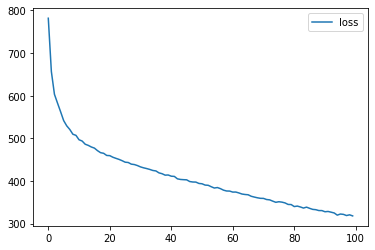

In [57]:
metrics30[['loss']].plot()

In [40]:
model30 = keras.models.load_model("my_dir/6ai-Conv-LSTM-30")

In [41]:
model30.predict((Wv30, Wv30x, Xv30))

array([[ 28.363724 ,  13.881647 ,  10.823495 ,  55.715374 ,  22.81417  ,
          3.6711793],
       [ 28.292479 ,  13.104168 ,  11.967885 ,  53.960796 ,  22.733671 ,
          2.9356332],
       [ 27.298342 ,  11.451973 ,  10.237592 ,  51.226223 ,  21.76978  ,
          1.5266519],
       ...,
       [ 41.732975 ,  40.303524 ,  53.30251  , 114.12804  ,  53.944122 ,
         20.610447 ],
       [ 39.861378 ,  38.507885 ,  49.123234 , 106.81023  ,  52.185158 ,
         15.901747 ],
       [ 38.73129  ,  37.42284  ,  54.189045 , 105.63263  ,  47.827717 ,
         15.014406 ]], dtype=float32)

### Evaluation on inverse_transform

In [ ]:
test_predictions30 = model30.predict((Wv30, Wv30x, Xv30))


MSE30 = mean_squared_error(yv30,test_predictions30)

MAE30 = mean_absolute_error(yv30,test_predictions30)

RMSE30 = np.sqrt(MSE30)

MAPE30 = mean_absolute_percentage_error(yv30,test_predictions30)*100

eval30 = [MSE30, MAE30, RMSE30, MAPE30]
print(eval30)

In [ ]:
GEH, count = ga.GEH(np.asarray(yv30), np.asarray(test_predictions30))
GEH30 = count/GEH.size
print(GEH30)

# 60 mins ahead

In [44]:
def build_model_60(hp):
    # Inputs
    channel_Wide = keras.layers.Input(shape=Wide_train_60.shape[1:], name="wide_week")
    channel_Widex = keras.layers.Input(shape=Wide_train_60_day.shape[1:], name="wide_day")
    channel_Deep = keras.layers.Input(shape=Xt60.shape[1:], name="deep_input")
    
    # Wide Model
    Wide_60 = keras.layers.Bidirectional(
        keras.layers.LSTM(units=hp.Int("wide_week_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu'))(channel_Wide)
    
    Wide_60x = keras.layers.Bidirectional(
        keras.layers.LSTM(units=hp.Int("wide_day_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu'))(channel_Widex)
    
    # Deep Model
    # CNN 
    CNN_60a = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    CNN_60b = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(CNN_60a)
    flatten_60 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_60b)
    # LSTM          
    LSTM_60a = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu', return_sequences=True)(flatten_60)
    LSTM_60b = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu', return_sequences=True)(LSTM_60a)
    Att_60 = SeqSelfAttention(attention_activation='tanh')(LSTM_60b)
    Reshaped_60 = keras.layers.Flatten()(Att_60)
    
    # Concatenation 
    concat = keras.layers.concatenate([Wide_60, Wide_60x, Reshaped_60])
    
    # Output
    output = keras.layers.Dense(n_features, name= "output")(concat)
    
    # Model
    model_60 = keras.Model(inputs=[channel_Wide, channel_Widex, channel_Deep], outputs=[output])

    # Compile
    model_60.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss='mse',metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_60

In [45]:
tuner60 = RandomSearch(
    build_model_60,
    objective="val_loss",
    max_trials=30,
    executions_per_trial=2,
    overwrite=False,
    directory=os.path.normpath('C:/RunsOak'),
    project_name="6ai-Conv-LSTM-60",
)

INFO:tensorflow:Reloading Oracle from existing project C:\RunsOak\6ai-Conv-LSTM-60\oracle.json
INFO:tensorflow:Reloading Tuner from C:\RunsOak\6ai-Conv-LSTM-60\tuner0.json


In [46]:
tuner60.search_space_summary()

Search space summary
Default search space size: 6
wide_week_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
wide_day_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
units_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [47]:
tuner60.search((Wt60, Wt60x, Xt60), yt60, epochs=200,
            validation_split = val_percent,
            callbacks=[early_stop],
            verbose=2)

Trial 31 Complete [00h 14m 18s]
val_loss: 579.5111694335938

Best val_loss So Far: 559.1917724609375
Total elapsed time: 04h 51m 54s
INFO:tensorflow:Oracle triggered exit


In [48]:
tuner60.results_summary(1)

Results summary
Results in C:\RunsOak\6ai-Conv-LSTM-60
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
wide_week_LSTM: 76
wide_day_LSTM: 76
filters: 256
kernel_size: 2
units_LSTM: 52
learning_rate: 0.001
Score: 559.1917724609375


### Best model

In [49]:
best_hp60 = tuner60.get_best_hyperparameters()[0]
model60 = tuner60.hypermodel.build(best_hp60)

In [50]:
scaler_filename = "Best_HP/6ai-Conv-LSTM-60"
joblib.dump(best_hp60, scaler_filename) 

['Best_HP/6ai-Conv-LSTM-60']

In [51]:
model60.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 3, 5, 6, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 time_distributed_3 (TimeDistri  (None, 3, 4, 5, 256  1280       ['deep_input[0][0]']             
 buted)                         )                                                                 
                                                                                                  
 time_distributed_4 (TimeDistri  (None, 3, 3, 4, 256  262400     ['time_distributed_3[0][0]']     
 buted)                         )                                                           

In [52]:
model60.fit((Wt60, Wt60x, Xt60), yt60, 
            epochs = 100,
            verbose = 1
            )

Epoch 1/100
1539/1539 [==============================] - 33s 19ms/step - loss: 1590.1169 - mean_absolute_error: 26.0389 - root_mean_squared_error: 39.8763 - mean_absolute_percentage_error: 45.9580
Epoch 2/100
1539/1539 [==============================] - 29s 19ms/step - loss: 763.9865 - mean_absolute_error: 19.4041 - root_mean_squared_error: 27.6403 - mean_absolute_percentage_error: 28.9039 9s - loss: 775.3289 - mea - ETA: 3s - loss: 771.7127 - mean_absolute_error: 19.4938 - root_mean_squared_error: 
Epoch 3/100
1539/1539 [==============================] - 29s 19ms/step - loss: 692.1244 - mean_absolute_error: 18.5393 - root_mean_squared_error: 26.3083 - mean_absolute_percentage_error: 27.6493
Epoch 4/100
1539/1539 [==============================] - 29s 19ms/step - loss: 668.7781 - mean_absolute_error: 18.1967 - root_mean_squared_error: 25.8607 - mean_absolute_percentage_error: 26.6563 7s - los
Epoch 5/100
1539/1539 [==============================] - 29s 19ms/step - loss: 645.6219 - mean

1539/1539 [==============================] - 28s 18ms/step - loss: 373.6651 - mean_absolute_error: 13.7197 - root_mean_squared_error: 19.3304 - mean_absolute_percentage_error: 20.0043
Epoch 69/100
1539/1539 [==============================] - 29s 19ms/step - loss: 371.7996 - mean_absolute_error: 13.6830 - root_mean_squared_error: 19.2821 - mean_absolute_percentage_error: 19.9733 4s - loss: 372.6003 - mean_absolute_error: 13.6847 - r
Epoch 70/100
1539/1539 [==============================] - 29s 19ms/step - loss: 371.8468 - mean_absolute_error: 13.6892 - root_mean_squared_error: 19.2833 - mean_absolute_percentage_error: 19.9594 12s - loss: 373.41 - ETA: 8s - loss: 372.6462 - mean_absolute_error: 13.7005 - root_mean_squared_error:  - ETA: 5s - loss: 372.5997 - mean_absolute_error
Epoch 71/100
1539/1539 [==============================] - 29s 19ms/step - loss: 366.1392 - mean_absolute_error: 13.5997 - root_mean_squared_error: 19.1347 - mean_absolute_percentage_error: 19.8407
Epoch 72/100
153

In [53]:
model60.save("my_dir/6ai-Conv-LSTM-60")

INFO:tensorflow:Assets written to: my_dir/6ai-Conv-LSTM-60\assets


In [54]:
metrics60 = pd.DataFrame(model60.history.history)

<AxesSubplot:>

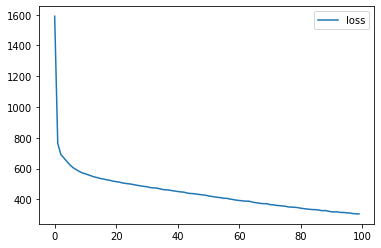

In [55]:
metrics60[['loss']].plot()

In [56]:
model60 = keras.models.load_model("my_dir/6ai-Conv-LSTM-60")

In [57]:
model60.predict((Wv60, Wv60x, Xv60))

array([[ 28.278862 ,  12.364379 ,  10.276216 ,  56.546482 ,  29.607153 ,
          2.7777977],
       [ 27.70048  ,  11.60172  ,   8.453691 ,  55.8013   ,  30.14506  ,
          2.6957703],
       [ 28.817532 ,  13.362412 ,   9.871713 ,  58.61265  ,  30.107601 ,
          3.9573326],
       ...,
       [ 41.080006 ,  37.90378  ,  51.26062  , 113.99451  ,  49.888058 ,
         13.142097 ],
       [ 40.86981  ,  38.288795 ,  45.231255 , 115.35764  ,  52.44448  ,
          8.709003 ],
       [ 41.643356 ,  38.14305  ,  52.06069  , 111.21376  ,  48.168083 ,
          6.9562836]], dtype=float32)

### Evaluation on inverse_transform

In [ ]:
test_predictions60 = model60.predict((Wv60, Wv60x, Xv60))


MSE60 = mean_squared_error(yv60,test_predictions60)

MAE60 = mean_absolute_error(yv60,test_predictions60)

RMSE60 = np.sqrt(MSE60)

MAPE60 = mean_absolute_percentage_error(yv60,test_predictions60)*100

eval60 = [MSE60, MAE60, RMSE60, MAPE60]
print(eval60)

In [ ]:
GEH, count = ga.GEH(np.asarray(yv60), np.asarray(test_predictions60))
GEH60 = count/GEH.size
print(GEH60)

# RESULTS

## General results

In [ ]:
l = ['MSE','MAE','RMSE','MAPE','Horizon']

In [ ]:
eval5.append(5)
eval15.append(15)
eval30.append(30)
eval60.append(60)

In [ ]:
df = pd.DataFrame(np.array([eval5,eval15,eval30,eval60]),columns=l)
df.set_index('Horizon')

## GEH

In [ ]:
n = [' 5 ',' 15 ',' 30 ',' 60 ']
df2 = pd.DataFrame(np.array([[GEH5, GEH15, GEH30, GEH60]]), columns=n)
print(df2)